In [2]:
#Set up paths
import sys
import os

from Utils import utils as uti

from Utils import GridUtils as GrU
from Utils import MakePressures as MkP

import RegridField as RgF

import regrid_HRxLR as rHL


# The usual
from datetime import date
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# Cartopy for pretty maps
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Some other useful packages 
import importlib
import copy
import time
import cftime
import yaml
import glob
#from box import Box #???

importlib.reload( rHL )
importlib.reload(MkP)
importlib.reload(GrU)


<module 'Utils.GridUtils' from '/glade/work/juliob/HiRes_ana/Drivers/Utils/GridUtils.py'>

In [3]:
%%time

rHL.drive()
#wO,wOx2xO,lonO,latO= rHL.drive()
#upwp,lon1,lat1 = rHL.drive()
#Xoo = rHL.drive()




{'Dst': 'fv1x1', 'DstVgrid': 'L93', 'Case': 'c153_topfix_ne240pg3_FMTHIST_xic_x02', 'Archive_base': None, 'Output_abs_dir': None, 'day': 1, 'frequency': 6, 'hour': 0, 'month': 7, 'year': 2004}
2004 int 7 int
1 int 0 int
1 int 0 int
[1]
[0]
ne240pg3_x_ne16pg3_CONSERVE_2ND will be created !!!!
Ready to go ... ne240pg3 -x- ne16pg3 0.0000 seconds
Finished Grid Mesh creation  44.5629 seconds
/glade/campaign/cesm/cesmdata/cseg/inputdata/share/scripgrids/ne16pg3_scrip_170429.nc 
 (13824,)
/glade/campaign/cesm/cesmdata/cseg/inputdata/share/scripgrids/ne240pg3_scrip_170628.nc 
 (3110400,)
Finished dstField,srcField  44.8945 seconds
/glade/work/juliob/GridFiles/Weights/ne240pg3_x_ne16pg3_CONSERVE_2ND.nc
Reading weights from /glade/work/juliob/GridFiles/Weights/ne240pg3_x_ne16pg3_CONSERVE_2ND.nc 
Finished generatind Regrd from wgts file 57.9599 seconds
ne16pg3_x_ne240pg3_BILINEAR will be created !!!!
Ready to go ... ne16pg3 -x- ne240pg3 0.0000 seconds
Finished Grid Mesh creation  47.9929 seconds


In [4]:
%%time
foo='/glade/derecho/scratch/juliob/archive//c153_topfix_ne240pg3_FMTHIST_xic_x02/atm/fv1x1/c153_topfix_ne240pg3_FMTHIST_xic_x02.cam.h1i.2004-07-01-00000.nc'
Xoo=xr.open_dataset( foo )

CPU times: user 6.57 ms, sys: 3.87 ms, total: 10.4 ms
Wall time: 12.4 ms


In [5]:
upwp=Xoo.upwp.values


f='/glade/derecho/scratch/juliob/archive/c153_topfix_ne240pg3_FMTHIST_xic_x02/atm/GWana/c153_topfix_ne240pg3_FMTHIST_xic_x02_GWana_xPyP_2004-07-01_2004-07-31.nc'
X1 = xr.open_dataset( f )

f = '/glade/derecho/scratch/juliob/archive/c153_topfix_ne240pg3_FMTHIST_xic_x02/atm/hist/c153_topfix_ne240pg3_FMTHIST_xic_x02.cam.h1i.2004-07-01-00000.nc'
X=xr.open_dataset( f )

target_plevs = [ 932.0, 856., 499., 227.0,  58., 2.8]
plevs = X.lev.values
lev_sel = uti.find_nearest_plev_indices(plev=plevs , target_levels=target_plevs )


print( X.lev.values[lev_sel] )
print( lev_sel )


uPomegaP = X1.uPomegaP.values


[931.99204257 855.78421029 498.51109676 227.21837597  58.48490616
   2.80419527]
[85 80 68 57 38 11]


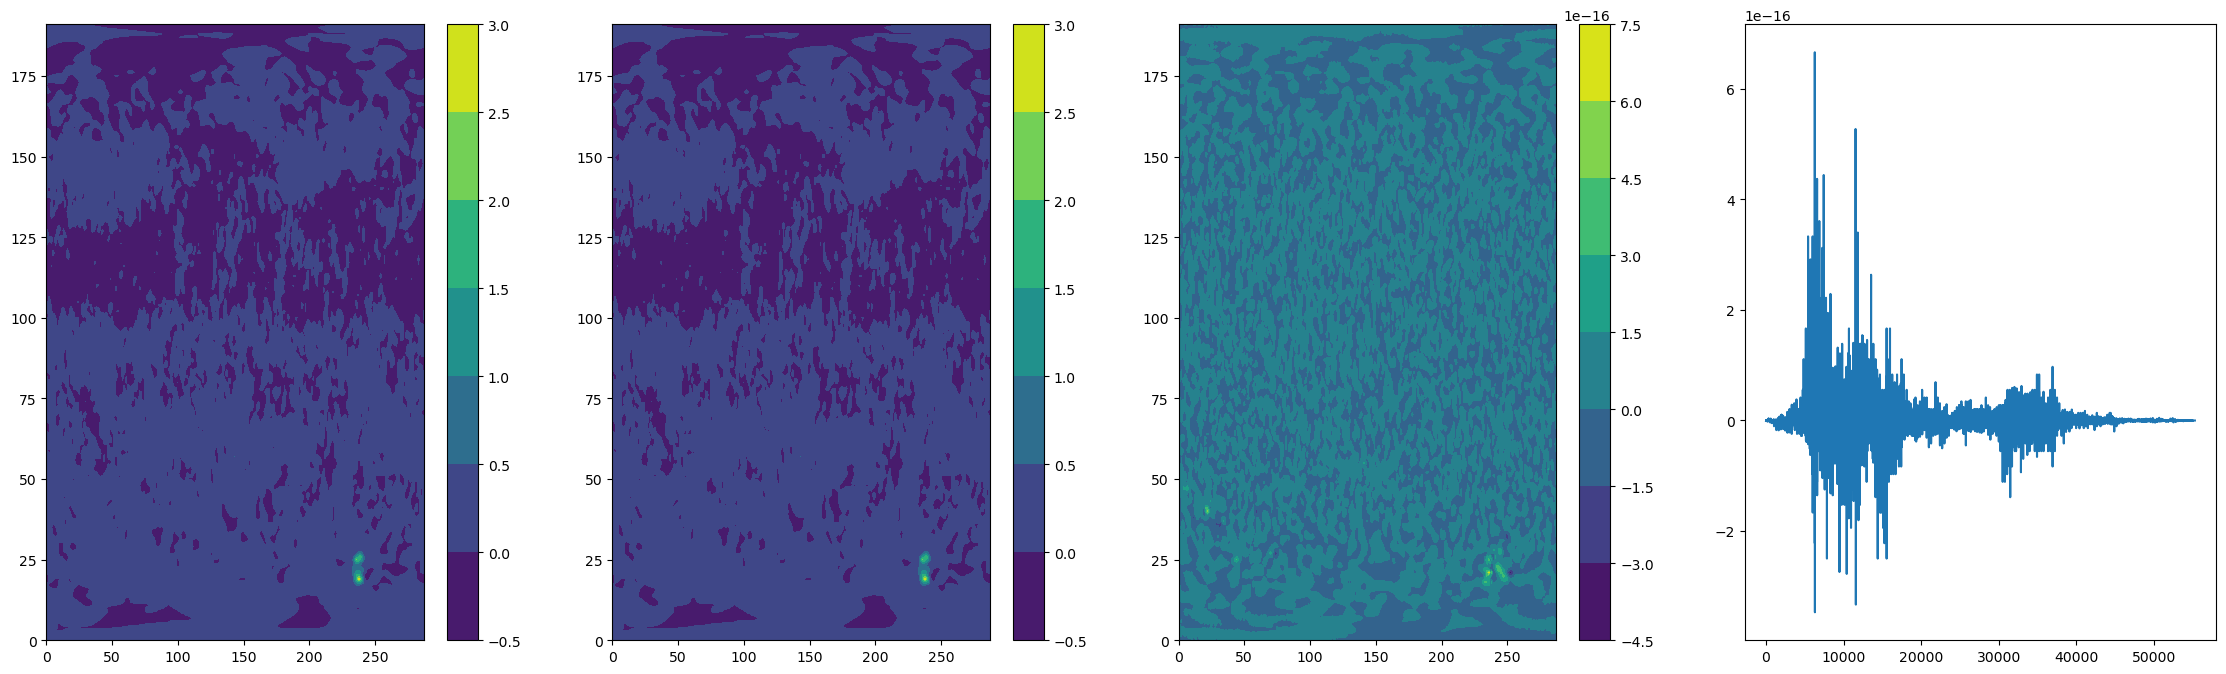

In [6]:
fig,axs=plt.subplots( 1,4, figsize=(28,8) ) 
ax=axs[0]
co=ax.contourf( uPomegaP[0,4,:,:] )
cbar = plt.colorbar( co )
ax=axs[1]
co=ax.contourf( upwp[0,38,:,:] )
cbar = plt.colorbar( co )
ax=axs[2]
co=ax.contourf( upwp[0,38,:,:] -  uPomegaP[0,4,:,:])
cbar = plt.colorbar( co )

ax=axs[3]
#ax.plot( upwp[0,38,:,:].flatten() )  # -  uPomegaP[0,4,:,:] )
ax.plot( (upwp[0,38,:,:] -  uPomegaP[0,4,:,:]).flatten() )



In [ ]:
X.PS.long_name

In [ ]:
Xoo.upwp